In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
def rmse(x, y):
    d = np.subtract(x, y)
    return np.sqrt(np.dot(d, d) / len(d))

In [4]:
data = pd.read_csv('Hyderabad.csv')
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [6]:
mean_price_by_loc = data.groupby(by='Location') \
                             .agg({'Price': 'mean'}) \
                             .to_dict() \
                             ['Price']

data['Location'] = data['Location'].map(mean_price_by_loc)
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,4.882123e+06,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,1.923888e+07,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,8.724922e+06,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,5.339650e+06,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,1.040443e+07,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
price = data['Price']
data.drop(columns='Price', inplace=True)

In [8]:
scaler = StandardScaler()
for col in data.columns:
    data[col] = scaler.fit_transform(data[[col]])
data.head()

,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,-0.408213,-0.827503,-0.907329,-0.542772,-0.25375,0.161499,0.179768,0.234503,0.270396,0.242197,...,0.015555,-0.222013,0.241716,-0.211451,-0.203772,-0.198493,-0.206412,-0.211211,-0.210492,-0.200653
1,2.484127,1.579231,2.003059,-0.542772,-0.25375,0.161499,0.179768,0.234503,0.270396,0.242197,...,0.015555,-0.222013,0.241716,-0.211451,-0.203772,-0.198493,-0.206412,-0.211211,-0.210492,-0.200653
2,-0.437699,-0.183305,-0.907329,-0.542772,-0.25375,0.161499,-0.439461,-0.381221,-0.344095,-0.373193,...,-0.626534,-0.222013,-0.373694,-0.211451,-0.203772,-0.198493,-0.206412,-0.211211,-0.210492,-0.200653
3,-0.468526,-0.750804,0.547865,1.842394,-0.25375,-0.459348,-0.439461,-0.381221,-0.344095,-0.373193,...,0.015555,-0.222013,-0.373694,-0.211451,-0.203772,-0.198493,-0.206412,-0.211211,-0.210492,-0.200653
4,-0.669569,0.098244,-0.907329,-0.542772,-0.25375,-0.459348,-0.439461,0.234503,-0.344095,-0.373193,...,0.015555,-0.222013,-0.373694,-0.211451,-0.203772,-0.198493,-0.206412,-0.211211,-0.210492,-0.200653


### 1) Model, based on all features

In [9]:
full_model = LinearRegression()
full_model.fit(data, price)
prediction = full_model.predict(data)
error = rmse(prediction, price)
print(f'final rmse = {error:.2f}')

final rmse = 4381904.31


In [10]:
coefs = list(zip(
    data.columns,
    full_model.coef_
))
coefs.sort(key=lambda t: abs(t[1]))
coefs

[('VaastuCompliant', -12570.44147706604),
 ('SwimmingPool', -82201.10851063297),
 ('MultipurposeRoom', 177698.30636157526),
 ('Intercom', -179261.33022338187),
 ('ShoppingMall', 187387.98788640407),
 ('SportsFacility', -204543.845165805),
 ('ATM', 253326.40406926983),
 ('Resale', 342971.07991898566),
 ('CarParking', 347408.75922116986),
 ('PowerBackup', 365518.0242642943),
 ('JoggingTrack', -388653.24882373103),
 ('Wardrobe', -442912.6096236404),
 ('RainWaterHarvesting', -513634.5513014039),
 ('LiftAvailable', -549342.8671747403),
 ("Children'splayarea", 574298.998992709),
 ('Wifi', 610055.1342902444),
 ('AC', 722824.0671245392),
 ('StaffQuarter', 730555.031260243),
 ('24X7Security', -734913.7549638549),
 ('LandscapedGardens', 798478.1398464432),
 ('IndoorGames', 866727.9558633877),
 ('No. of Bedrooms', -918657.1659152603),
 ('Gasconnection', 939867.5238151524),
 ('ClubHouse', 944399.4044748396),
 ('WashingMachine', 1000379.11477779),
 ('Gymnasium', -1089524.7553890557),
 ('Hospital', 

### 2) Model, based only on house's area

In [11]:
part_data = data[['Area']]
part_model = LinearRegression()
part_model.fit(part_data, price)
prediction = part_model.predict(part_data)
error = rmse(prediction, price)
print(f'final rmse = {error:.2f}')

slope = part_model.coef_[0]
y_intercept = part_model.intercept_
print(f'slope = {slope:.2f}')
print(f'y-intercept = {y_intercept:.2f}')

final rmse = 4903580.54
slope = 7277500.50
y-intercept = 9818379.64


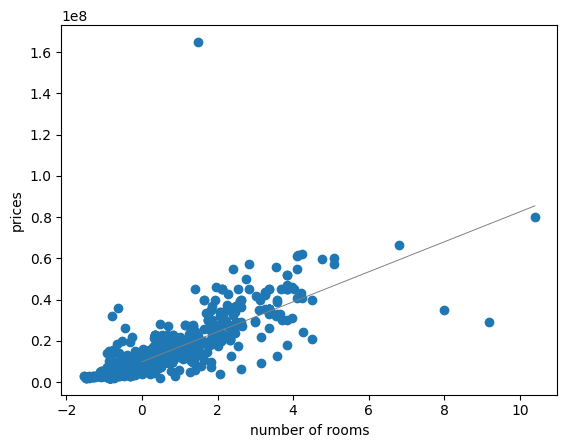

In [12]:
from utils import *

plot_points(data['Area'], price)
draw_line(slope, y_intercept, starting=0, ending=max(data['Area']))
plt.show()